# Power Outages
* **See the main project notebook for instructions to be sure you satisfy the rubric!**
* See Project 03 for information on the dataset.
* A few example prediction questions to pursue are listed below. However, don't limit yourself to them!
    * Predict the severity (number of customers, duration, or demand loss) of a major power outage.
    * Predict the cause of a major power outage.
    * Predict the number and/or severity of major power outages in the year 2020.
    * Predict the electricity consumption of an area.

Be careful to justify what information you would know at the "time of prediction" and train your model using only those features.

# Summary of Findings


### Introduction
<p>Power outage dataset includes data of power outage information in the continental U.S. from January 2000 to July 2016. A major power outage, for the purpose of this project, is defined as a power outage that impacted at least 50,000 customers or caused an unplanned firm load loss of atleast 300MW.</p>
<p>This data provides valuable information that can be used to conduct future research in various paradigms, such as—state-level power outage risk maps for the continental U.S., predicting demand load loss, analyzing vulnerability of the U.S. states to frequent major power outages, and studying historical trends of major power outages. Other than basic information of state, climate, time, this dataset also includes electricity consumption patterns, economic characteristics, and land-use characteristics, each with many sub-sections to signify it's characteristics.</p>
The problem I am trying to solve is "predicting the cause cateogory of a major power outage", and this would be a <b>classification</b> problem since "cause category" is categorical/nominal data. I would choose "accuracy" as my objective.


### Baseline Model
There are a total of 48 generic features I used to create my baseline model, of which 43 are continous varaibles, and 5 are nominal varaibles.
<br>
- The continuous variables include: ['YEAR', 'MONTH', 'ANOMALY.LEVEL', 'RES.PRICE', 'COM.PRICE', 'IND.PRICE', 'TOTAL.PRICE', 'RES.SALES', 'COM.SALES', 'IND.SALES', 'TOTAL.SALES','RES.PERCEN', 'COM.PERCEN', 'IND.PERCEN', 'RES.CUSTOMERS', 'COM.CUSTOMERS', 'IND.CUSTOMERS', 'TOTAL.CUSTOMERS', 'RES.CUST.PCT', 'COM.CUST.PCT', 'IND.CUST.PCT', 'PC.REALGSP.STATE', 'PC.REALGSP.USA', 'PC.REALGSP.REL', 'PC.REALGSP.CHANGE', 'UTIL.REALGSP', 'TOTAL.REALGSP', 'UTIL.CONTRI', 'PI.UTIL.OFUSA', 'POPULATION', 'POPPCT_URBAN', 'POPPCT_UC', 'POPDEN_URBAN', 'POPDEN_UC', 'POPDEN_RURAL', 'AREAPCT_URBAN', 'AREAPCT_UC', 'PCT_LAND', 'PCT_WATER_TOT', 'PCT_WATER_INLAND', 'DEMAND.LOSS.MW', 'CUSTOMERS.AFFECTED', 'OUTAGE.DURATION']
<br>
- Whereas the nominal variables include: ['U.S._STATE', 'POSTAL.CODE', 'NERC.REGION', 'CLIMATE.REGION', 'CLIMATE.CATEGORY']

<p> For the continuous variables, I impute the missing values with 0 to generate generic features. For the nominal variables, I used onehot encoding (handling_unknown='ignore') to generate my generic features.</p>

#### Result & Intepretation
Averaging over 100 trails of prediction and gennerating accuracy scores, I got a distribution of accuracy scores (below in the code) and find a score of __73.55__ using RandomForestClassifier() with default parameters. From my perspective, this score is relatively good, because a score 73.55 means that 73.55% of the prediction is correctly classified.


### Final Model
To generate a final models, new features are created using the generic columns. The are a total of 9 new features created. Specific detailed of what the new features are and why the new features are created are listed below:
- 1) Log transformation of ['ANOMALY.LEVEL', 'DEMAND.LOSS.MW', 'CUSTOMERS.AFFECTED', 'OUTAGE.DURATION']
    - Log transformation is used here to make highly skewed data less skewed so as to make the classification more 
- 2) Imputation of mean & distribution
    - I examined the dependence of the missingness of 'DEMAND.LOSS.MW' (45.96% missing) and 'CUSTOMERS.AFFECTED' (28.87% missing) using permutation test and appropriate test statistics, and found that these two columns are MAR dependent on a lot of other columns, such as Year, Month, Anomaly levels, Outage Duration, Electricity consumption, Economic characteristic, and Land-use characteristic, and also on each other. Therefore, imputing the columns simply with 0 would disrupt the original distirbution of the data. Thus, I choose to impute thses two columns using distribution imputation.
    - However, since other columns have really unbalanced missing/non-missing rate (all other columns that are missing values have a less than 4% missing rate), and examining columns with unblanced missing rate through imputations would not render easy-to-identify outcomes, I choose to impute those columns with means to differentiate from simply imputing with 0.
- 3) PCA on categorical columns
    - Other than just using onehot encoding to pre-process the categorical data, I also generate a new feature using PCA after using the onehot encoder. PCA serves as a means to decompose multiple features and synthesize them into the principal components, which serves as a comprehensive view on the categorical columns
- 4) Onehot encoding on categorical columns dependent on cause category
    - I also examine the dependence of cause category on different categorical columns using permutation test and test statistic of tvd, and found that cause category is dependent on 'U.S._STATE', 'POSTAL.CODE', 'NERC.REGION', 'CLIMATE.REGION'.
    - Therefore, I choose use these columns as another main new feature to apply onehot encoding and PCA to generate a comprehensive feature of how the dependent categorical columns are.
- 5) PCA on characteristic information
    - Electricity consumption has 18 subsections, economic characteristic has 9 subsections, and land-use characteristic has 11 subsections. Since we need to further examine the relationship of land-use characteristics, electricity consumption patterns, and economic characteristics with cause category, it is better that we combine all the subsections within one characteristic into one wholistic and comprehensive value to represent each characteristic.
    - Therefore, I also applied PCA on each characteristic information columns to generate three new characteristic information features.
- 6) Polynomial features
    - Other than dependece of cause category on categorical features, I also examine its dependence on continous columns, and found that cause category is dependent on 'YEAR', 'ANOMALY.LEVEL', 'DEMAND.LOSS.MW', 'CUSTOMERS.AFFECTED', 'OUTAGE.DURATION'. And since polynomial features (containing information such as x*y) are generate to capture the dependence within each columns, and these columns are also dependent on cause category, it would be useful to have such as polynomial feature representing the dependence.
- 7) Standardization, 8) Normalization, 9) Power Transformation
    - These three feature are applied on the continuous columns that cause category are dependent on (i.e. 'YEAR', 'ANOMALY.LEVEL', 'DEMAND.LOSS.MW', 'CUSTOMERS.AFFECTED', 'OUTAGE.DURATION'). These three transformation made the distribution of the continuous data more normalize and stadardized. 

<br>
After simply using the default RandomForestClassifier() parameters to average over 100 trials of accuracy scores, I got an accuracy score of __76.32__, which improves the original baseline model's accuracy score by almost 2%. Right after the new featured models are created, I conduct a model search (models include DecisionTreeClassifier, RandomForestClassifier, KNeighborsClassifier, SGDClassifier, and GradientBoostingClassifier) by hand (I comment out most of the code, because it takes a long long time for some of them to actually finish running), and a parameter search using GridSearchCV. Results are shown in the __Result & Interpretation__ section below.
<br>

#### Result & Intepretation
I found that GradientBoostingClassifier() has the best perforamcen (accuracy score) with an average accuracy score over 100 trials of __82.54__, with parameter of max_depth=10, min_samples_leaf=2, min_samples_split=3, which means that averaging over 100 trials 82.54% of the cause category in the testing sets are accurately prediceted, a 6% increase from the original performance.


### Fairness Evaluation
I wanted to see if there is a difference in prediction for cause cateogry before July and after July. So I separate the data sets into before July and after July groups. I then performed a permutation test to see if there is true positive difference between the prediction before July and the predictiona after July. I choose recall scores/sensitivity as my test statistics because correctly predicting the cause cateogry is more important in my case. If we correctly predict the cause category of the outage, then we would be able to more successfully determine and solution and tackle the problems.
<br>
- Null Hypothesis: The scores are not different in terms of True Positive Parity
- Alternative Hypothesis: The scores are different in terms of True Positive Parity
- Test statistics: sensitivity/recall score
- Alpha level: 0.05
<br>
I found a p value of 0.27, which is larger than the pre-determined alpha level. Therefore, I do not have sufficient evidence to reject the null hypothesis, meaning that the model there is probably no bias for before July and after July groups prediction.

# Code

In [1136]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import util

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # Higher resolution figures

In [1313]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import PowerTransformer

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

### Data Loading & Cleaning from project 03

In [652]:
# Load data
to_drop = ['variables', 'OBS', 'CAUSE.CATEGORY.DETAIL', 'HURRICANE.NAMES',
           'OUTAGE.START.DATE', 'OUTAGE.START.TIME', 'OUTAGE.RESTORATION.DATE', 'OUTAGE.RESTORATION.TIME']
fp = os.path.join('data', 'outage.xlsx')
df = pd.read_excel(fp, header=0, skiprows=[0, 1, 2, 3, 4, 6]).drop(columns=to_drop) # Load df, skip unuseful rows

"""
# Combine date and time into datetime
df['OUTAGE.START'] = (df['OUTAGE.START.DATE'] + 
                      pd.to_timedelta(df['OUTAGE.START.TIME']
                      .astype(str))) # Combine START into date
df['OUTAGE.RESTORATION'] = (df['OUTAGE.RESTORATION.DATE'] +
                            pd.to_timedelta(df['OUTAGE.RESTORATION.TIME']
                            .astype(str))) # Combine RESTORATION into date
df = df.drop(columns=['OUTAGE.START.DATE', 'OUTAGE.START.TIME',
                      'OUTAGE.RESTORATION.DATE', 'OUTAGE.RESTORATION.TIME']) # Drop columns
"""
# Maybe need to check the missingness before analysis
major_outage = (outage[(outage['DEMAND.LOSS.MW'] > 300) & # Firm load loss > 300MW
                       (outage['CUSTOMERS.AFFECTED'] > 50000)] # Customers > 50000
                       .reset_index(drop=True)) # Reset index

In [653]:
df.head()

,YEAR,MONTH,U.S._STATE,POSTAL.CODE,NERC.REGION,CLIMATE.REGION,ANOMALY.LEVEL,CLIMATE.CATEGORY,CAUSE.CATEGORY,OUTAGE.DURATION,...,POPPCT_URBAN,POPPCT_UC,POPDEN_URBAN,POPDEN_UC,POPDEN_RURAL,AREAPCT_URBAN,AREAPCT_UC,PCT_LAND,PCT_WATER_TOT,PCT_WATER_INLAND
0,2011,7.0,Minnesota,MN,MRO,East North Central,-0.3,normal,severe weather,3060.0,...,73.27,15.28,2279.0,1700.5,18.2,2.14,0.6,91.592666,8.407334,5.478743
1,2014,5.0,Minnesota,MN,MRO,East North Central,-0.1,normal,intentional attack,1.0,...,73.27,15.28,2279.0,1700.5,18.2,2.14,0.6,91.592666,8.407334,5.478743
2,2010,10.0,Minnesota,MN,MRO,East North Central,-1.5,cold,severe weather,3000.0,...,73.27,15.28,2279.0,1700.5,18.2,2.14,0.6,91.592666,8.407334,5.478743
3,2012,6.0,Minnesota,MN,MRO,East North Central,-0.1,normal,severe weather,2550.0,...,73.27,15.28,2279.0,1700.5,18.2,2.14,0.6,91.592666,8.407334,5.478743
4,2015,7.0,Minnesota,MN,MRO,East North Central,1.2,warm,severe weather,1740.0,...,73.27,15.28,2279.0,1700.5,18.2,2.14,0.6,91.592666,8.407334,5.478743


### Baseline Model

In [651]:
# Continuous column
con_col = ['YEAR', 'MONTH', 'ANOMALY.LEVEL', 'RES.PRICE', 'COM.PRICE', 'IND.PRICE', 
           'TOTAL.PRICE', 'RES.SALES', 'COM.SALES', 'IND.SALES', 'TOTAL.SALES',
           'RES.PERCEN', 'COM.PERCEN', 'IND.PERCEN', 'RES.CUSTOMERS', 'COM.CUSTOMERS',
           'IND.CUSTOMERS', 'TOTAL.CUSTOMERS', 'RES.CUST.PCT', 'COM.CUST.PCT',
           'IND.CUST.PCT', 'PC.REALGSP.STATE', 'PC.REALGSP.USA', 'PC.REALGSP.REL',
           'PC.REALGSP.CHANGE', 'UTIL.REALGSP', 'TOTAL.REALGSP', 'UTIL.CONTRI',
           'PI.UTIL.OFUSA', 'POPULATION', 'POPPCT_URBAN', 'POPPCT_UC',
           'POPDEN_URBAN', 'POPDEN_UC', 'POPDEN_RURAL', 'AREAPCT_URBAN',
           'AREAPCT_UC', 'PCT_LAND', 'PCT_WATER_TOT', 'PCT_WATER_INLAND',
           'DEMAND.LOSS.MW', 'CUSTOMERS.AFFECTED', 'OUTAGE.DURATION']

# Categorical column
cat_col = ['U.S._STATE', 'POSTAL.CODE', 'NERC.REGION', 'CLIMATE.REGION', 'CLIMATE.CATEGORY']

# All columns
all_col = con_col + cat_col
outage = major_outage.copy()

In [796]:
# Imputation
simimp = SimpleImputer(missing_values=np.nan, strategy='mean')

# Onehot transformation
ohe_trans = Pipeline(steps=[
    ('imp', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))
])

In [862]:
%%time
an = []
for i in range(100):
    # Train/Test set
    X = outage.drop(['CAUSE.CATEGORY',], axis=1)
    y = outage['CAUSE.CATEGORY']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

    # preprocessing pipeline (put them together)
    preproc = (ColumnTransformer(transformers=[
        ('imp_0', SimpleImputer(strategy='constant', fill_value=0), con_col),
        ('onehot', ohe_trans, cat_col),],
                                 remainder='passthrough'))

    pl = Pipeline(steps=[('preprocessor', preproc), ('regressor', RandomForestClassifier())])
    # pl = Pipeline(steps=[('regressor', LinearRegression())])

    # predic_4 = new_pl.predict(data.loc[:, ~data.columns.isin(['y'])])
    # scores_train = cross_val_score(pl, X_train, y_train, cv=5)
    # scores_train  # R^2

    pl.fit(X_train, y_train)
    y_pred = pl.predict(X_test)
    an.append(round(accuracy_score(y_pred, y_test) * 100, 2))

Wall time: 22.8 s


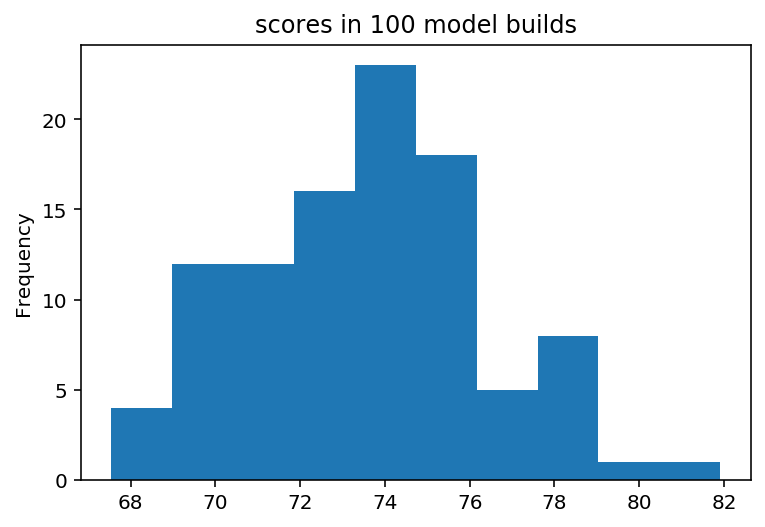

In [863]:
pd.Series(an).plot(kind='hist', title='scores in 100 model builds');

In [864]:
np.array(an).mean()

73.5529

### Final Model

In [423]:
df.isnull().mean()

YEAR                  0.000000
MONTH                 0.005867
U.S._STATE            0.000000
POSTAL.CODE           0.000000
NERC.REGION           0.000000
CLIMATE.REGION        0.003911
ANOMALY.LEVEL         0.005867
CLIMATE.CATEGORY      0.005867
CAUSE.CATEGORY        0.000000
OUTAGE.DURATION       0.037810
DEMAND.LOSS.MW        0.459583
CUSTOMERS.AFFECTED    0.288787
RES.PRICE             0.014342
COM.PRICE             0.014342
IND.PRICE             0.014342
TOTAL.PRICE           0.014342
RES.SALES             0.014342
COM.SALES             0.014342
IND.SALES             0.014342
TOTAL.SALES           0.014342
RES.PERCEN            0.014342
COM.PERCEN            0.014342
IND.PERCEN            0.014342
RES.CUSTOMERS         0.000000
COM.CUSTOMERS         0.000000
IND.CUSTOMERS         0.000000
TOTAL.CUSTOMERS       0.000000
RES.CUST.PCT          0.000000
COM.CUST.PCT          0.000000
IND.CUST.PCT          0.000000
PC.REALGSP.STATE      0.000000
PC.REALGSP.USA        0.000000
PC.REALG

In [824]:
# Characteristic column
elec_chara = (['RES.PRICE', 'COM.PRICE', 'IND.PRICE', 
               'TOTAL.PRICE', 'RES.SALES', 'COM.SALES',
               'IND.SALES', 'TOTAL.SALES', 'RES.PERCEN', 
               'COM.PERCEN', 'IND.PERCEN', 'RES.CUSTOMERS',
               'COM.CUSTOMERS', 'IND.CUSTOMERS', 'TOTAL.CUSTOMERS',
               'RES.CUST.PCT', 'COM.CUST.PCT', 'IND.CUST.PCT'])
econ_chara = (['PC.REALGSP.STATE', 'PC.REALGSP.USA', 'PC.REALGSP.REL', 
               'PC.REALGSP.CHANGE', 'UTIL.REALGSP', 'TOTAL.REALGSP',
               'UTIL.CONTRI', 'PI.UTIL.OFUSA'])
land_chara = (['POPULATION', 'POPPCT_URBAN', 'POPPCT_UC',
               'POPDEN_URBAN', 'POPDEN_UC', 'POPDEN_RURAL',
               'AREAPCT_URBAN', 'AREAPCT_UC', 'PCT_LAND',
               'PCT_WATER_TOT', 'PCT_WATER_INLAND'])

# Function to compute PCA
def pca_fit(df, names):
    # pull out required data
    dms = []
    for name in names:
        dms.append(df[name])

    # initialize PCA object
    pca = PCA(n_components=2, whiten=True)
    # combine data
    pca_data = np.array(dms).T
    # fit the dimensionality reduction model
    pca_fit = pca.fit_transform(pca_data)
    
    return pca_fit

# Get the null index of elec, land for future refill
elec_isnull = outage[elec_chara].isnull().any(axis=1)
elec_todrop = outage[elec_isnull].index # Null index of 

land_isnull = outage[land_chara].isnull().any(axis=1)
land_todrop = outage[land_isnull].index

pca_elec = pca_fit(outage.fillna(0), elec_chara) # Combined PCA of elec
pca_econ = pca_fit(outage, econ_chara) # Combined PCA of econ
pca_land = pca_fit(outage.fillna(0), land_chara) # Combined PCA of land
cleaned = (outage.assign(ELEC_CHARA=[elec[0] for elec in pca_elec], # Add PCA cols
                        ECON_CHARA=[econ[0] for econ in pca_econ],
                        LAND_CHARA=[land[0] for land in pca_land])
                .drop(columns=elec_chara+econ_chara+land_chara)) # Drop chara cols
cleaned.loc[elec_todrop, 'ELEC_CHARA'] = np.nan # Refill NaN for elec
cleaned.loc[land_todrop, 'LAND_CHARA'] = np.nan # Refill NaN for land
cleaned.head()

,YEAR,MONTH,U.S._STATE,POSTAL.CODE,NERC.REGION,CLIMATE.REGION,ANOMALY.LEVEL,CLIMATE.CATEGORY,CAUSE.CATEGORY,OUTAGE.DURATION,DEMAND.LOSS.MW,CUSTOMERS.AFFECTED,ELEC_CHARA,ECON_CHARA,LAND_CHARA
0,2011.0,7.0,Minnesota,MN,MRO,East North Central,-0.3,normal,severe weather,3060.0,385.378071,70000.0,-0.796251,-0.741393,-0.811961
1,2010.0,10.0,Minnesota,MN,MRO,East North Central,-1.5,cold,severe weather,3000.0,367.273843,70000.0,-0.916723,-0.751898,-0.815354
2,2012.0,6.0,Minnesota,MN,MRO,East North Central,-0.1,normal,severe weather,2550.0,370.730294,68200.0,-0.864862,-0.735626,-0.809015
3,2010.0,11.0,Minnesota,MN,MRO,East North Central,-1.4,cold,severe weather,1860.0,320.709410,60000.0,-0.902576,-0.751898,-0.815354
4,2010.0,7.0,Minnesota,MN,MRO,East North Central,-0.9,cold,severe weather,2970.0,349.012175,63000.0,-0.813456,-0.751898,-0.815354


#### Missingness & Imputation

In [424]:
# Function to check the missingess
def missingness_check(outage, column, title, N=1000):
    """check the missingness of columns on all other cols in outage"""
    demand_miss = outage.assign(IS_NULL=outage[column].isnull())
    cols = outage.columns.drop([column]) # Columns to check
    
    for i in range(len(cols)): # Check missingness
        col = cols[i] # Get the columns

        # Different cols have different functions
        if demand_miss[col].dtype == int or demand_miss[col].dtype == float: # Number type
            func = util.diff_in_means # Difference in means
            stats, obs = (util.permutation_test(demand_miss, # Perform permutation test
                                            col, 'IS_NULL', # Dep col, check col
                                            func, N)) # Function, trials
            p_val = np.min([np.count_nonzero(np.array(stats) <= obs) / N, 
                            np.count_nonzero(np.array(stats) >= obs) / N]) # P-value

        elif demand_miss[col].dtype == object: # String Type
            func = util.tvd # Total Variation Distance
            stats, obs = (util.permutation_test(demand_miss, # Perform permutation test
                                            col, 'IS_NULL', # Dep col, check col
                                            func, N)) # Function, trials
            p_val = np.count_nonzero(np.array(stats) >= obs) / N # P-value

        else: # Datetime continuous category type
            func = util.ks # KS statistic
            stats, obs = (util.permutation_test(demand_miss, # Perform permutation test
                                            col, 'IS_NULL', # Dep col, check col
                                            func, N)) # Function, trials
            p_val = np.count_nonzero(np.array(stats) >= obs) / N # P-value

        if p_val < 0.05:
            # util.plot_distribution(stats, obs, i, title, col, p_val) # Plot distribution
            print(title + col + ', p_val is ' + str(p_val))
    return

##### 1) Missingness of Demand Loss

In [825]:
# Missingness of Demand Loss
missingness_check(cleaned, 'DEMAND.LOSS.MW', 'Demand Loss Dependence on ')

Demand Loss Dependence on YEAR, p_val is 0.0
Demand Loss Dependence on MONTH, p_val is 0.0
Demand Loss Dependence on ANOMALY.LEVEL, p_val is 0.0
Demand Loss Dependence on OUTAGE.DURATION, p_val is 0.0
Demand Loss Dependence on CUSTOMERS.AFFECTED, p_val is 0.0
Demand Loss Dependence on ELEC_CHARA, p_val is 0.0
Demand Loss Dependence on ECON_CHARA, p_val is 0.0
Demand Loss Dependence on LAND_CHARA, p_val is 0.0


Demand Loss (MW) is MAR dependent on Year, Month, Anomaly levels, Outage duration, Customers affected, Electricity consumption, Economic characteristic, and Land-use characteristic.

##### 2) Missingness of Customers Affected

In [826]:
# Missingness of Customers Affected
missingness_check(cleaned, 'CUSTOMERS.AFFECTED', 'Affected Customers Dependence on ')

Affected Customers Dependence on YEAR, p_val is 0.0
Affected Customers Dependence on MONTH, p_val is 0.0
Affected Customers Dependence on ANOMALY.LEVEL, p_val is 0.0
Affected Customers Dependence on OUTAGE.DURATION, p_val is 0.0
Affected Customers Dependence on DEMAND.LOSS.MW, p_val is 0.0
Affected Customers Dependence on ELEC_CHARA, p_val is 0.0
Affected Customers Dependence on ECON_CHARA, p_val is 0.0
Affected Customers Dependence on LAND_CHARA, p_val is 0.0


Number of Customers Affected is MAR dependent on Year, Month, Anomaly levels, Demand Loss (MW), Outage Duration, Electricity consumption, Economic characteristic, and Land-use characteristic.

##### Choice of imputation for demand loss, outage duration, and number of customers affected
- Demand loss: Iterative Imputer because Demand Loss in MAR dependent on a lot of columns
- Customers affected: Iterative Imputer because customers affected is MAR dependent on a lot of columns
- Other conlumns: Use simple imputation of mean because the missing values are of really small percentages, and would not be ok if I just dropped them due to differences in rows causing prediction errors.

#### Check Cause Category's Dependence on other columns

In [804]:
checkc = ['YEAR', 'MONTH', 'ANOMALY.LEVEL', 'OUTAGE.DURATION', 'DEMAND.LOSS.MW', 'CUSTOMERS.AFFECTED '] # 'ELEC_CHARA', 'ECON_CHARA', 'LAND_CHARA'
N = 1000
for col in cleaned.columns:
    stats, obs = util.permutation_test(cleaned, col, 'CAUSE.CATEGORY', util.tvd, N=1000)
    p_val = np.min([np.count_nonzero(np.array(stats) <= obs) / N, 
                                np.count_nonzero(np.array(stats) >= obs) / N])
    print('CAUSE.CATEGORY Dependence on ' + col + ' is ' + str(p_val))

CAUSE.CATEGORY Dependence on YEAR is 0.0
CAUSE.CATEGORY Dependence on MONTH is 0.005
CAUSE.CATEGORY Dependence on U.S._STATE is 0.0
CAUSE.CATEGORY Dependence on POSTAL.CODE is 0.0
CAUSE.CATEGORY Dependence on NERC.REGION is 0.0
CAUSE.CATEGORY Dependence on CLIMATE.REGION is 0.0
CAUSE.CATEGORY Dependence on ANOMALY.LEVEL is 0.0
CAUSE.CATEGORY Dependence on CLIMATE.CATEGORY is 0.208
CAUSE.CATEGORY Dependence on CAUSE.CATEGORY is 0.0
CAUSE.CATEGORY Dependence on OUTAGE.DURATION is 0.0
CAUSE.CATEGORY Dependence on DEMAND.LOSS.MW is 0.426
CAUSE.CATEGORY Dependence on CUSTOMERS.AFFECTED is 0.193
CAUSE.CATEGORY Dependence on ELEC_CHARA is 0.0
CAUSE.CATEGORY Dependence on ECON_CHARA is 0.0
CAUSE.CATEGORY Dependence on LAND_CHARA is 0.0


Cause category is dependent on YEAR, MONTH, STATE, CLIMATE REGION, ANOMALY LEVEL, OUTAGE DURATION, and all characteristic information according to the permutation test. Therefore, I will choese columns as my base below for further addition of features.

#### Build Pipeline, and fit model

In [944]:
# Imputation
simimp = SimpleImputer(missing_values=np.nan, strategy='mean')
iterimp = IterativeImputer(max_iter=5, random_state=0)

# Preprocessing PowerTransformer, OrdinalEncoder
# Standardization Transformation
std_trans = Pipeline(steps=[
    ('imp', simimp),
    ('std', StandardScaler())
])

# Normalization Transformation
norm_trans = Pipeline(steps=[
    ('imp', simimp),
    ('norm', Normalizer())
])

# Polynomial Transformation
poly_trans = Pipeline(steps=[
    ('imp', simimp),
    ('poly', PolynomialFeatures(interaction_only=True, include_bias=False))
])


# Onehot transformation
ohe_trans = Pipeline(steps=[
    ('imp', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False)),
])

# Power transformation
pow_trans = Pipeline(steps=[
    ('imp', simimp),
    ('ordinal', PowerTransformer()),
])

# Log transformation
def log_na(narray):
    return np.log(narray.replace(0, 1))
log_func = FunctionTransformer(log_na)
log_trans = Pipeline(steps=[
    ('log', log_func),
    ('imp', SimpleImputer(strategy='constant', fill_value=0))
])

# Characteristic transformation into one, PCA
chara_trans = Pipeline(steps=[
    ('imp', simimp),
    ('pca', PCA(svd_solver='full', n_components=2))
])

# Onehot transformation with pca
ohe_pca_trans = Pipeline(steps=[
    ('imp', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False)),
    ('pca', PCA(svd_solver='full', n_components=0.99))
])

# Columns for transformation
poly_col = ['YEAR', 'ANOMALY.LEVEL', 'DEMAND.LOSS.MW', 'CUSTOMERS.AFFECTED', 'OUTAGE.DURATION']
sim_col = ['YEAR', 'ANOMALY.LEVEL', 'OUTAGE.DURATION', 'MONTH']
ite_col = ['DEMAND.LOSS.MW', 'CUSTOMERS.AFFECTED']
cate_col = ['U.S._STATE', 'POSTAL.CODE', 'NERC.REGION', 'CLIMATE.REGION']

In [1193]:
%%time
an_improve = []
for i in range(100):
    # Train/Test set
    X = outage.drop(['CAUSE.CATEGORY',], axis=1)
    y = outage['CAUSE.CATEGORY']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

    # preprocessing pipeline (put them together)
    preproc = (ColumnTransformer(transformers=[
        ('imp_0', SimpleImputer(strategy='constant', fill_value=0), con_col), # Preprocessing
        ('log', log_trans, ['ANOMALY.LEVEL', 'DEMAND.LOSS.MW',
                            'CUSTOMERS.AFFECTED', 'OUTAGE.DURATION']), # Feature 7: Log transforamtion
        ('sim_imp', simimp, sim_col), # Feature 4: Imputation of mean/dist instead of 0
        ('ite_imp', iterimp, ite_col),
        ('onehot', ohe_trans, cat_col), # Preprocessing
        ('onehot_dep', ohe_trans, cate_col), # Feature 5: Onehot encoder on dependent col
        ('onehot_pca_dep', ohe_pca_trans, cate_col), # Feature 6: PCA after onehot on dependent col
        ('elec_trans', chara_trans, elec_chara), # Feature 8: PCA for characteristics
        ('econ_trans', chara_trans, econ_chara),
        ('land_trans', chara_trans, land_chara),
        ('poly', poly_trans, poly_col), # Feature 9: polynomial features on dependent columns
        ('std', std_trans, poly_col), # Feature 1: Standardization
        ('norm', norm_trans, poly_col), # Feature 2: Normalization
        ('pow', pow_trans, poly_col), # Feature 3: Power Transformation
    ],
                                 remainder='passthrough'))

    pl = Pipeline(steps=[('preprocessor', preproc), ('regressor', RandomForestClassifier())])

    pl.fit(X_train, y_train)
    y_pred = pl.predict(X_test)
    an_improve.append(round(accuracy_score(y_pred, y_test) * 100, 2))

Wall time: 40.4 s


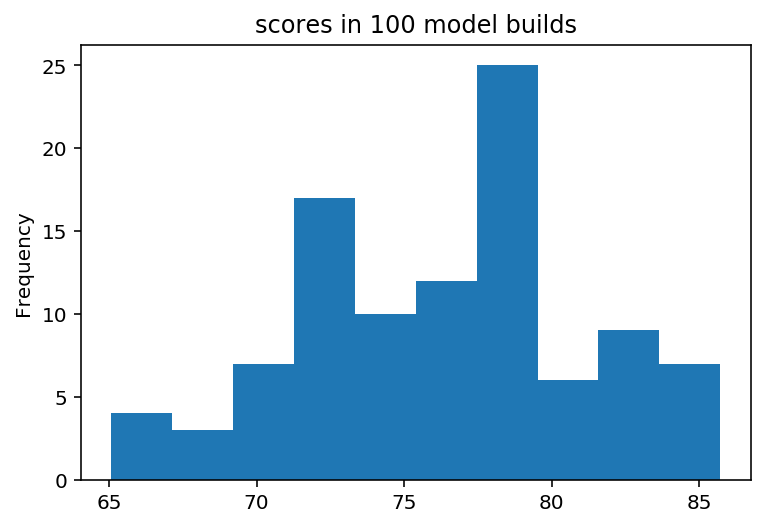

In [1194]:
pd.Series(an_improve).plot(kind='hist', title='scores in 100 model builds');

In [1195]:
np.array(an_improve).mean()

76.3183

#### Search for best model and parameters

In [1206]:
%%time
# Train/Test set
X = outage.drop(['CAUSE.CATEGORY',], axis=1)
y = outage['CAUSE.CATEGORY']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

# preprocessing pipeline (put them together)
preproc = (ColumnTransformer(transformers=[
    ('imp_0', SimpleImputer(strategy='constant', fill_value=0), con_col), # Preprocessing
    ('log', log_trans, ['ANOMALY.LEVEL', 'DEMAND.LOSS.MW',
                        'CUSTOMERS.AFFECTED', 'OUTAGE.DURATION']), # Feature 7: Log transforamtion
    ('sim_imp', simimp, sim_col), # Feature 4: Imputation of mean/dist instead of 0
    ('ite_imp', iterimp, ite_col),
    ('onehot', ohe_trans, cat_col), # Preprocessing
    ('onehot_dep', ohe_trans, cate_col), # Feature 5: Onehot encoder on dependent col
    ('onehot_pca_dep', ohe_pca_trans, cate_col), # Feature 6: PCA after onehot on dependent col
    ('elec_trans', chara_trans, elec_chara), # Feature 8: PCA for characteristics
    ('econ_trans', chara_trans, econ_chara),
    ('land_trans', chara_trans, land_chara),
    ('poly', poly_trans, poly_col), # Feature 9: polynomial features on dependent columns
    ('std', std_trans, poly_col), # Feature 1: Standardization
    ('norm', norm_trans, poly_col), # Feature 2: Normalization
    ('pow', pow_trans, poly_col), # Feature 3: Power Transformation
],
                             remainder='passthrough'))

parameters = {
    'max_depth': [2,3,4,5,7,10,13,15,18,None], 
    'min_samples_split':[2,3,5,7,10,15,20],
    'min_samples_leaf':[2,3,5,7,10,15,20]
}

clf = GridSearchCV(GradientBoostingClassifier(), parameters, cv=5)
pl = Pipeline(steps=[('preprocessor', preproc), ('regressor', clf)])
pl.fit(X_train, y_train)
clf.best_params_, len(clf.cv_results_['mean_test_score'])

Wall time: 8min 26s


({'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 3}, 490)

#### Final best model after GridSearch

In [1322]:
# ans = []
# for i in range(100):
#     # Train/Test set
#     X = outage.drop(['CAUSE.CATEGORY',], axis=1)
#     y = outage['CAUSE.CATEGORY']
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
#     pl = Pipeline(steps=[('preprocessor', preproc), ('regressor', DecisionTreeClassifier(max_depth=10, 
#                                                                                          min_samples_leaf=3,
#                                                                                          min_samples_split=2))])
#     pl.fit(X_train, y_train)
#     y_pred = pl.predict(X_test)
#     ans.append(round(accuracy_score(y_pred, y_test) * 100, 2))
# np.mean(ans)

In [1322]:
# ans = []
# for i in range(100):
#     # Train/Test set
#     X = outage.drop(['CAUSE.CATEGORY',], axis=1)
#     y = outage['CAUSE.CATEGORY']
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
#     pl = Pipeline(steps=[('preprocessor', preproc), ('regressor', KNeighborsClassifier(max_depth=7, 
#                                                                                        min_samples_leaf=2,
#                                                                                        min_samples_split=2))])
#     pl.fit(X_train, y_train)
#     y_pred = pl.predict(X_test)
#     ans.append(round(accuracy_score(y_pred, y_test) * 100, 2))
# np.mean(ans)

In [1322]:
# ans = []
# for i in range(100):
#     # Train/Test set
#     X = outage.drop(['CAUSE.CATEGORY',], axis=1)
#     y = outage['CAUSE.CATEGORY']
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
#     pl = Pipeline(steps=[('preprocessor', preproc), ('regressor', SGDClassifier(max_depth=None, 
#                                                                                 min_samples_leaf=3,
#                                                                                 min_samples_split=3))])
#     pl.fit(X_train, y_train)
#     y_pred = pl.predict(X_test)
#     ans.append(round(accuracy_score(y_pred, y_test) * 100, 2))
# np.mean(ans)

In [1353]:
# ans = []
# for i in range(100):
#     # Train/Test set
#     X = outage.drop(['CAUSE.CATEGORY',], axis=1)
#     y = outage['CAUSE.CATEGORY']
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
#     pl = Pipeline(steps=[('preprocessor', preproc), ('regressor', RandomForestClassifier(max_depth=10, 
#                                                                                          min_samples_leaf=2,
#                                                                                          min_samples_split=3))])
#     pl.fit(X_train, y_train)
#     y_pred = pl.predict(X_test)
#     ans.append(round(accuracy_score(y_pred, y_test) * 100, 2))
# np.mean(ans)

In [1343]:
ans = []
for i in range(100):
    # Train/Test set
    X = outage.drop(['CAUSE.CATEGORY',], axis=1)
    y = outage['CAUSE.CATEGORY']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
    pl = Pipeline(steps=[('preprocessor', preproc), ('regressor', GradientBoostingClassifier(max_depth=10, 
                                                                                             min_samples_leaf=2,
                                                                                             min_samples_split=3))])
    pl.fit(X_train, y_train)
    y_pred = pl.predict(X_test)
    ans.append(round(accuracy_score(y_pred, y_test) * 100, 2))
np.mean(ans)

82.54

### Fairness Evaluation

In [1334]:
results = X_test
results['pred'] = y_pred# pd.Series(y_pred).apply(binarize)
results['cause'] = y_test# pd.Series(y_test).apply(binarize)

results['before_july'] = (results.MONTH < 7).replace({True:'Before July', False:'After July'})

(
    results
    .groupby('before_july')
    .apply(lambda x: metrics.recall_score(x.cause, x.pred, average='micro'))
    .rename('precision')
    .to_frame()
)

,precision
before_july,
After July,0.685714
Before July,0.678571


In [1300]:
obs = (results.groupby('before_june')
       .apply(lambda x: metrics.recall_score(x.cause, x.pred, average='micro'))
       .diff().iloc[-1])

In [1301]:
metrs = []
for _ in range(100):
    s = (
        results[['before_june', 'pred', 'cause']]
        .assign(before_june=results.before_june.sample(frac=1.0, replace=False).reset_index(drop=True))
        .groupby('before_june')
        .apply(lambda x: metrics.recall_score(x.cause, x.pred, average='micro'))
        .diff()
        .iloc[-1]
    )
    
    metrs.append(s)

0.27


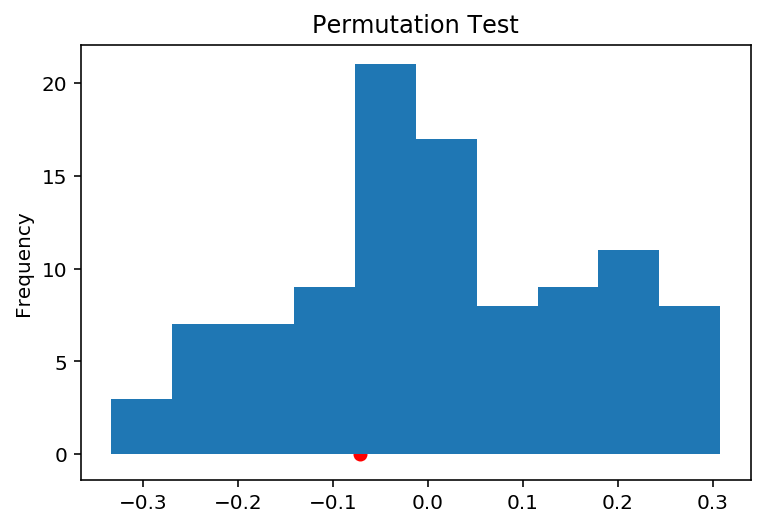

In [1335]:
print(pd.Series(metrs <= obs).mean())
pd.Series(metrs).plot(kind='hist', title='Permutation Test')
plt.scatter(obs, 0, c='r');

### Util package I used

In [670]:
def permutation_test(data, col, group_col, test_statistic, N=1000):
    """
    Return the distribution of permuted statistics and the observed statistic
    resulting from a permutation test.

    :param: data: DataFrame of data observations and the labels for two groups.
    :param: col: Column name for the column containing the data.
    :param: group_col: Column name for the column contain the labels for the two groups.
    :param: test_statistic: The test statistic to apply to the groups (a function).
    :param: N: The number of times N to run the permutation test.
    """

    # get the observed test statistic
    obs = test_statistic(data, col, group_col)

    # run the permutations
    shuffled_stats = []
    for _ in range(N):
        
        shuffled = data[group_col].sample(frac=1, replace=False).reset_index(drop=True)
        with_shuffled = data[[col]].assign(shuffled=shuffled)
        shuffled_stat = test_statistic(with_shuffled, col, 'shuffled')
        shuffled_stats.append(shuffled_stat)

    shuffled_stats = np.array(shuffled_stats)

    return shuffled_stats, obs

In [671]:
def tvd(data, col, group_col):
    """tvd of the distribution of values in col
    bewteen the two groups of group_col. col is
    assumed to be categorical."""

    tvd = (
        data
        .pivot_table(
            index=col, 
            columns=group_col, 
            aggfunc='size', 
            fill_value=0
        )
        .apply(lambda x: x / x.sum())
        .diff(axis=1).iloc[:, -1].abs().sum() / 2
        )

    return tvd